<a href="https://colab.research.google.com/github/jennychen0223/Automated_Optical_Inspection-AOI/blob/main/Aidea_AOI_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from glob import glob
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras import optimizers, regularizers, metrics, regularizers, models, layers, utils
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import ntpath
from keras.applications.vgg16 import VGG16
from PIL import Image 
from random import shuffle
from sklearn.preprocessing import OneHotEncoder
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! cp "/content/drive/My Drive/aoi/train.csv" /content/
! cp "/content/drive/My Drive/aoi/test.csv" /content/

In [ ]:
! unzip /content/drive/MyDrive/train_images.zip > data_unzip.log

In [ ]:
train_path = '/content/train_images/train/'
valid_path = '/content/train_images/valid/'
test_path = '/content/train_images/test/'

In [ ]:
from keras.applications.inception_v3 import InceptionV3
from keras import optimizers, regularizers, metrics, regularizers, models, layers, utils
from keras.layers import Conv2D,MaxPooling2D,Activation,Flatten,Dense,Dropout
from time import gmtime, strftime
import matplotlib.pyplot as plt

In [ ]:
test_path2 = 'test_images/'

In [ ]:
train_datagen = ImageDataGenerator(
      rescale=1./255, #影象張量的數字縮放
      rotation_range=40, # 角度值，0~180，影象旋轉
      width_shift_range=0.2, # 水平平移，相對總寬度的比例
      height_shift_range=0.2, # 垂直平移，相對總高度的比例
      shear_range=0.2, # 隨機錯切換角度
      zoom_range=0.2, # 隨機縮放範圍
      horizontal_flip=True, # 一半影象水平翻轉
      fill_mode='nearest') # 填充新建立畫素的方法

In [ ]:
train_generator = train_datagen.flow_from_directory(
      train_path, # 目標目錄
      target_size=(224, 224), 
      classes=['0', '1', '2', '3', '4', '5'],
      batch_size=32,
      class_mode='categorical') 

Found 1769 images belonging to 6 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = test_datagen.flow_from_directory(
        valid_path,
        target_size=(224, 224),
        classes=['0', '1', '2', '3', '4', '5'],
        batch_size=32,
        class_mode='categorical')

Found 379 images belonging to 6 classes.


In [ ]:
#plot images
from PIL import Image
sample_training_images, _ = next(train_generator)
def plotImages(images_arr): 
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

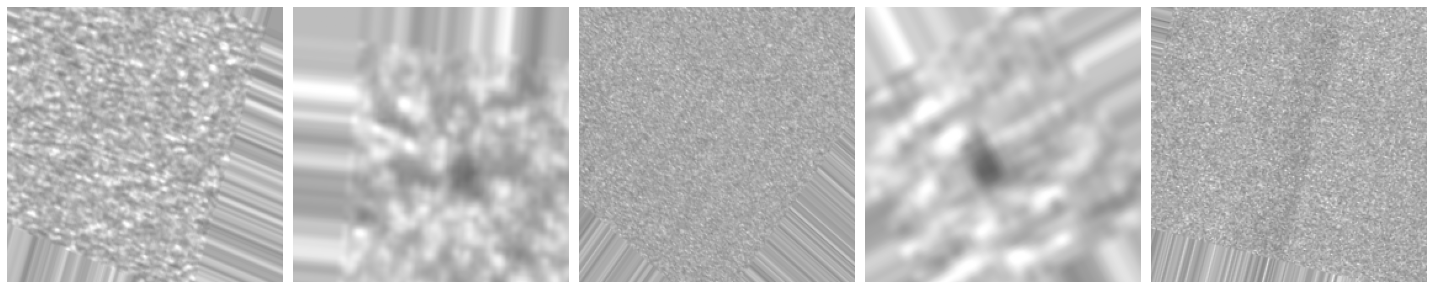

In [ ]:
plotImages(sample_training_images[:5])

In [ ]:
conv_base = VGG16(weights='imagenet', 
                  include_top=False,
                  input_shape=(224,224,3))

model = models.Sequential()
model.add(conv_base)

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
model.add(Conv2D(32, (1, 1),activation="relu"))
model.add(Dropout(0.2))
model.add(Conv2D(64,(3, 3),activation="relu"))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(32))
model.add(Dense(64))

model.add(Dense(64))

model.add(Dense(6,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
conv2d (Conv2D)              (None, 7, 7, 32)          16416     
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 5, 5, 64)          18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                5

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=50,
      epochs=15,
      validation_data=validation_generator,
      validation_steps=10
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
50/50 [==============================] - 89s 671ms/step - loss: 1.4137 - acc: 0.4424 - val_loss: 0.9657 - val_acc: 0.6156
Epoch 2/15
50/50 [==============================] - 28s 558ms/step - loss: 0.9790 - acc: 0.6374 - val_loss: 0.8477 - val_acc: 0.7000
Epoch 3/15
50/50 [==============================] - 30s 589ms/step - loss: 0.8677 - acc: 0.6749 - val_loss: 0.8887 - val_acc: 0.6875
Epoch 4/15
50/50 [==============================] - 29s 568ms/step - loss: 0.7851 - acc: 0.7166 - val_loss: 0.7265 - val_acc: 0.7281
Epoch 5/15
50/50 [==============================] - 29s 583ms/step - loss: 0.7688 - acc: 0.7358 - val_loss: 0.7047 - val_acc: 0.7844
Epoch 6/15
50/50 [==============================] - 30s 590ms/step - loss: 0.6714 - acc: 0.7606 - val_loss: 0.6565 - val_acc: 0.8125
Epoch 7/15
50/50 [==============================] - 29s 565ms/step - loss: 0.6520 - acc: 0.7625 - val_loss: 0.6703 - val_acc: 0.8062
Epoch 8/15
50/50 [==============================] - 30s 591ms/step - 

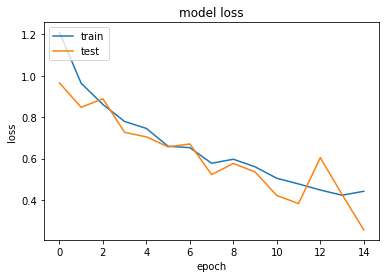

In [ ]:
# plot model loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

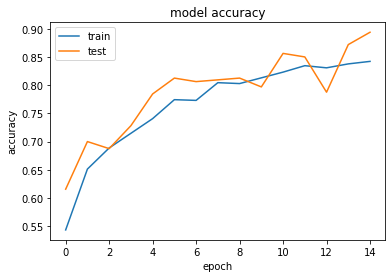

In [ ]:
# plot model accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size=(224, 224),
        classes=['0', '1', '2', '3', '4', '5'],
        batch_size=32,
        class_mode='categorical')

Found 380 images belonging to 6 classes.


In [ ]:
test_loss, test_acc = model.evaluate_generator(
	test_generator, 
	steps=test_generator.samples//test_generator.batch_size)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1948: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


In [ ]:
print('test acc:', test_acc)


test acc: 0.9176136255264282


進行預測

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator2 = test_datagen.flow_from_directory(
        '.',
        target_size=(224, 224),
        class_mode='categorical',
        classes=['test_images'],
	      batch_size=1,
	      shuffle=False)

In [ ]:
predict = model.predict_generator(
    test_generator2,
    steps=test_generator2.samples//test_generator2.batch_size)

In [ ]:
import csv
i =0 
#f1 = open ("inFile","r") # open input file for reading
with open('output.csv', 'w') as csvfile:
	writer = csv.writer(csvfile)
	writer.writerow(['ID', 'Label'])
	#print(len(predict))
	while i < len(predict):
		#image, label = test_generator2._get_batches_of_transformed_samples(np.array([i]))
		image_name = test_generator2.filenames[i]
		result=np.where(predict[i] == np.amax(predict[i]))[0][0]
		writer.writerow([image_name, result])
		i=i+1
	print(i)

In [ ]:
result = pd.read_csv('output.csv')
result.head()

In [ ]:
result["ID"] = result["ID"].str.replace("test_images/t","t")
result.head()

In [ ]:
import pandas as pd
result.to_csv('Result.csv', index=False )
